In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})
import scram as scram
from scipy.interpolate import interp1d
import importlib
importlib.reload(scram)

<module 'scram' from '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/xrs3/SCRAM_V2/scram.py'>

# Here, we validate the interpolation model constructed using KNR.ipynb

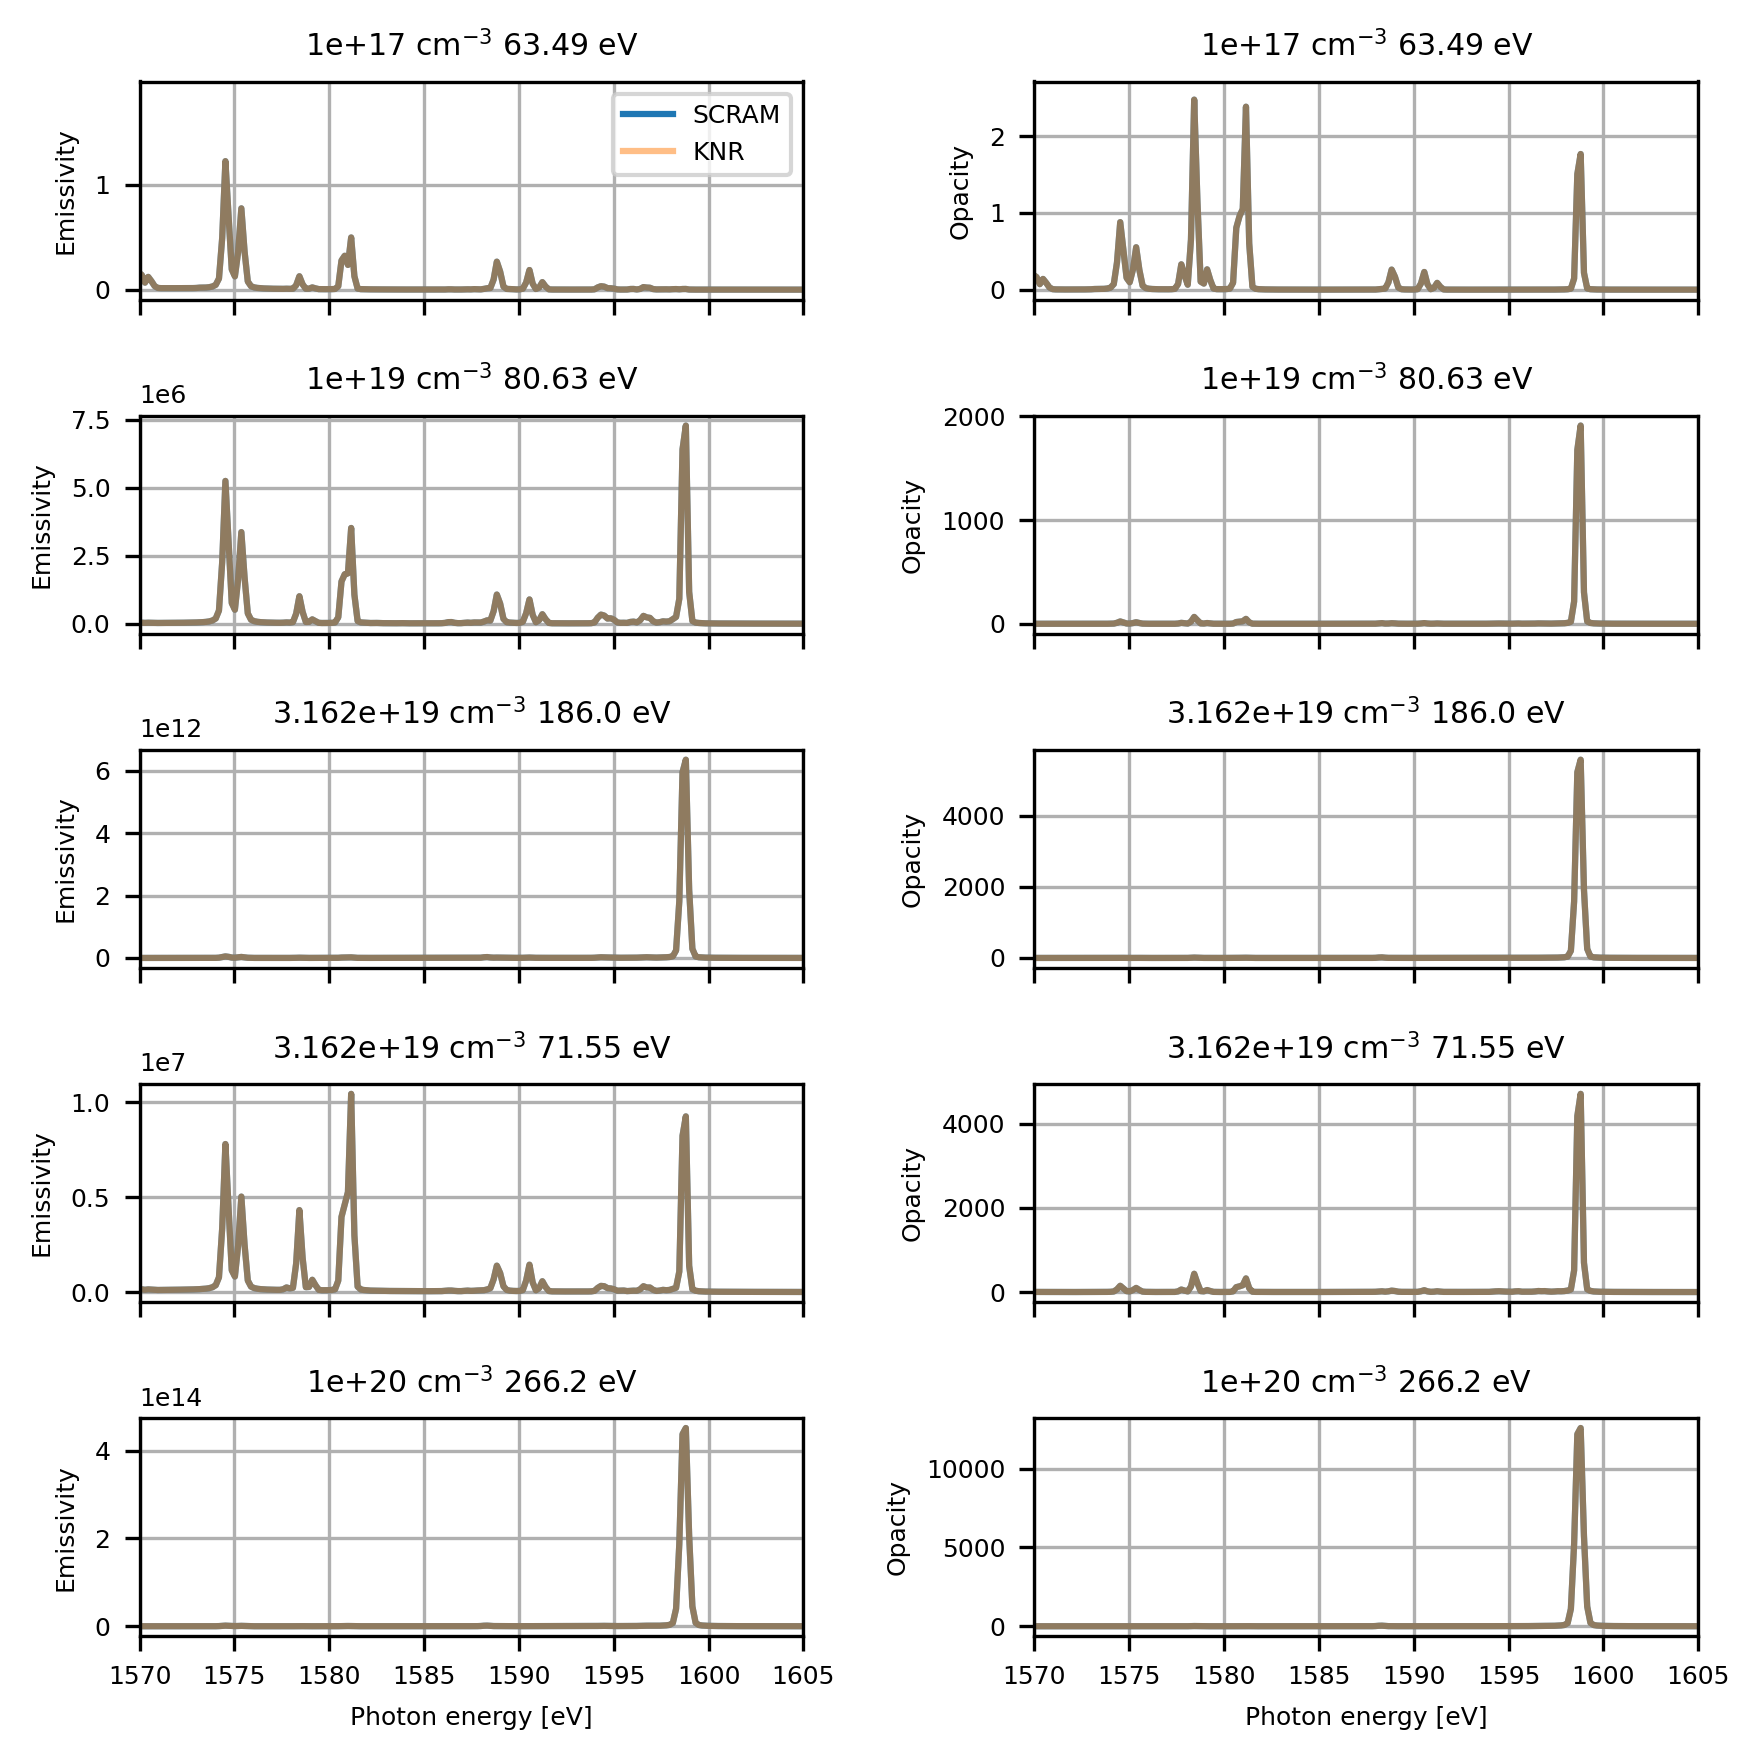

In [4]:
# Load the ni and T values used for the SCRAM Simulation
n_list = np.loadtxt('./Al-MARZ2_scram_tables/ni.txt')# cm^-3
T_list = np.loadtxt('./Al-MARZ2_scram_tables/Te.txt') # eV

# Plot some example spectra

n_idx = np.random.randint(0,n_list.shape[0], size=5) # randomly generate some indixes
T_idx = np.random.randint(0,T_list.shape[0], size=5)

n_idx.sort() # sort so ni is increaisng

ni = n_list[n_idx]; T = T_list[T_idx] # values corresponding to indices

fig,axs = plt.subplots(ni.shape[0],2,figsize=(6,6),dpi=300,sharex=True)

for ii in range(ni.shape[0]):
    
    E = np.load('./Al-MARZ2_scram_tables/E.npy') # eV
    emi = np.load('./Al-MARZ2_scram_tables/emi_scram.npy') # W/eV/cm^-3
    opa = np.load('./Al-MARZ2_scram_tables/opa_scram.npy') # cm^-1
    values = np.load('./Al-MARZ2_scram_tables/values_scram.npy') # denisty cm^-3 and Te eV
    
    idx = np.argwhere((values[:,0] == ni[ii]) & (values[:,1] == T[ii]))
    

    axs[ii,0].plot(np.squeeze(E),np.squeeze(emi[idx,:]),label='SCRAM')
    axs[ii,0].set_title(str(ni[ii]) + ' cm$^{-3}$ ' + str(T[ii]) + ' eV')
    axs[ii,0].set_ylabel('Emissivity')
    
    axs[ii,1].plot(np.squeeze(E),np.squeeze(opa[idx,:]))
    axs[ii,1].set_title(str(ni[ii]) + ' cm$^{-3}$ ' + str(T[ii]) + ' eV')
    axs[ii,1].set_ylabel('Opacity')
    axs[ii,1].grid()
    
    # KNR model
    emi_knr = scram.getEmi(ni[ii],T[ii])
    opa_knr = scram.getOpa(ni[ii],T[ii])
    
    axs[ii,1].plot(E,opa_knr,alpha=0.5,label='KNR')
    axs[ii,0].plot(E,emi_knr,alpha=0.5,label='KNR')
    axs[ii,0].grid()
    
    

axs[ni.shape[0]-1,0].set_xlabel("Photon energy [eV]")
axs[ni.shape[0]-1,1].set_xlabel("Photon energy [eV]")
axs[-1,0].set_xlim([1570,1605])
axs[-1,1].set_xlim([1570,1605])
axs[0,0].legend()
fig.tight_layout(pad=2.0)
plt.show()

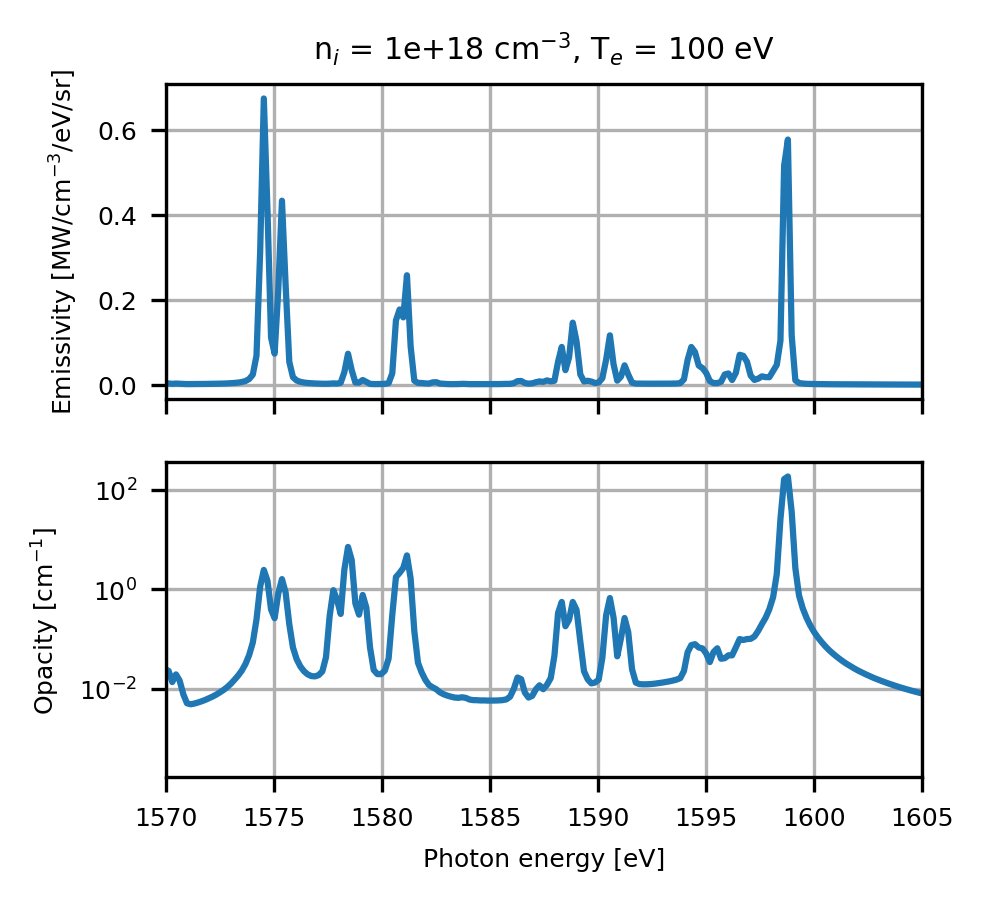

In [16]:
# KNR model

ni = 1e18
T = 100

E = np.load('./Al-MARZ2_scram_tables/E.npy') # eV

fig,axs = plt.subplots(2,1,figsize=(6.5/2,3),dpi=300,sharex=True)

emi_knr = scram.getEmi(ni,T)
opa_knr = scram.getOpa(ni,T)
    
axs[1].plot(E,opa_knr,alpha=1)
axs[1].set_ylabel('Opacity [cm$^{-1}$]')
axs[0].plot(E,emi_knr/1e6,alpha=1)
axs[0].set_ylabel('Emissivity [MW/cm$^{-3}$/eV/sr]')
    
axs[0].set_title('n$_i$ = ' + str(ni) + ' cm$^{-3}$, T$_e$ = ' + str(T) + ' eV')
    
axs[1].set_xlabel("Photon energy [eV]")
axs[1].set_xlim([1570,1605])

axs[0].grid()
axs[1].grid()

axs[1].set_yscale('log')


plt.show()

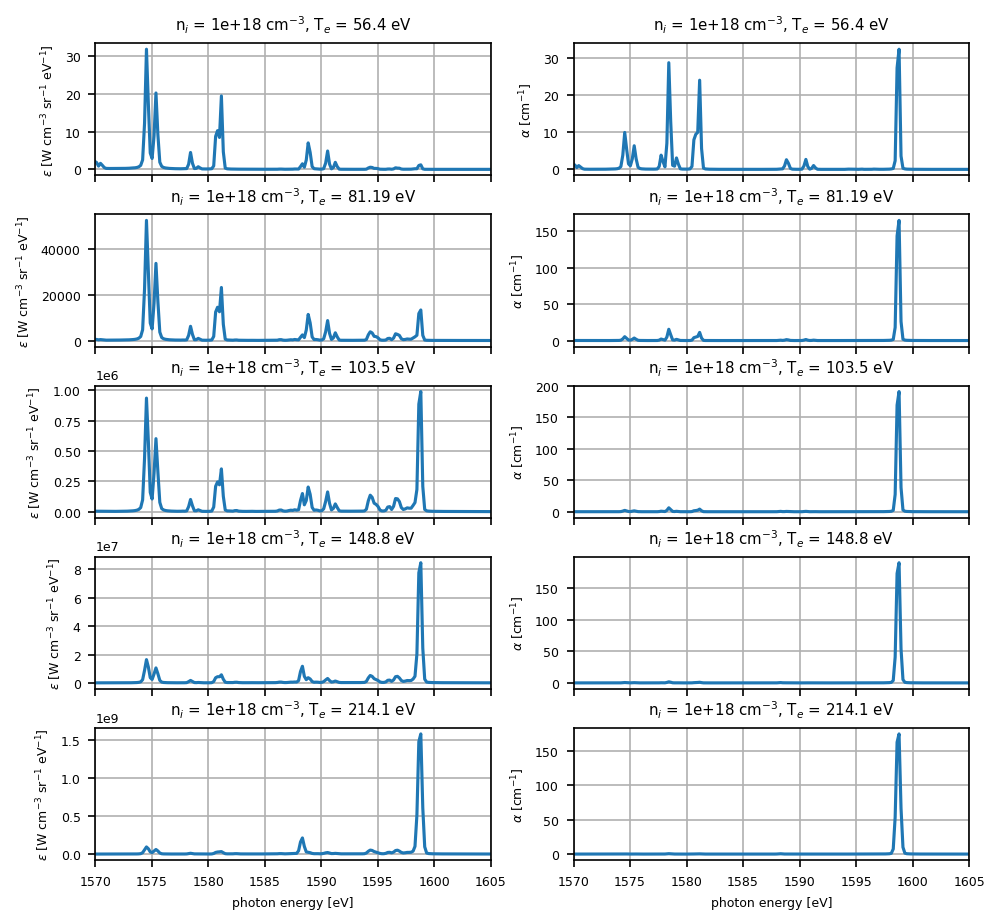

In [19]:
plt.rcParams.update({'font.size': 6})

ni = 1e18 # cm^-3
T = np.array([56.4,81.19,103.5,148.8,214.1])

E = np.load('./Al-MARZ2_scram_tables/E.npy') # eV
fig,axs = plt.subplots(T.shape[0],2,figsize=(6.5,6),dpi=150,sharex=True)
for ii in range(T.shape[0]):
    emi = scram.getEmi(ni,T[ii])
    opa = scram.getOpa(ni,T[ii])
    
    axs[ii,0].plot(E,emi)
    axs[ii,0].set_ylabel('$\\epsilon$ [W cm$^{-3}$ sr$^{-1}$ eV$^{-1}$]')
    axs[ii,0].set_title('n$_i$ = ' + str(ni) + ' cm$^{-3}$, T$_e$ = ' + str(T[ii]) + ' eV')
    axs[ii,0].grid()
    axs[ii,0].set_xlim(1570,1605)
    
    axs[ii,1].plot(E,opa)
    axs[ii,1].set_ylabel('$\\alpha$ [cm$^{-1}$]')
    axs[ii,1].set_title('n$_i$ = ' + str(ni) + ' cm$^{-3}$, T$_e$ = ' + str(T[ii]) + ' eV')
    axs[ii,1].grid()
    axs[ii,1].set_xlim(1570,1605)

axs[-1,0].set_xlabel('photon energy [eV]')    
axs[-1,1].set_xlabel('photon energy [eV]')  

fig.tight_layout(pad=0.2)    

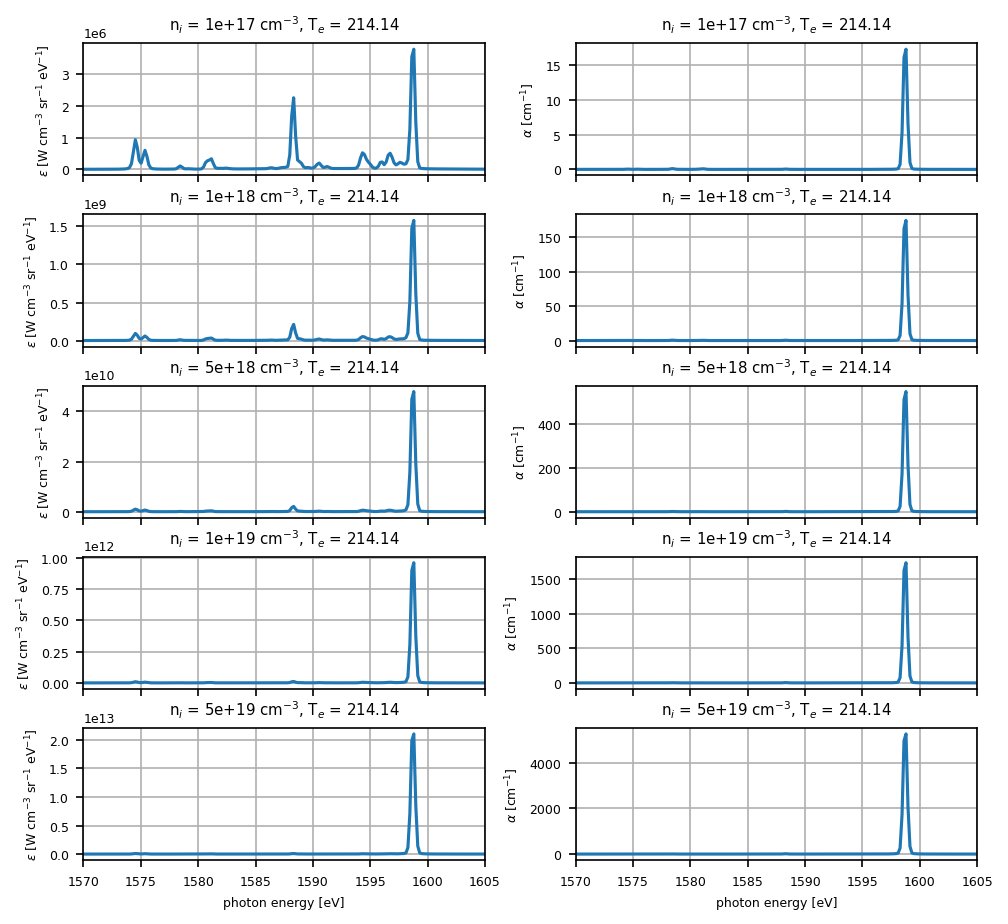

In [20]:
ni = np.array([1e17,1e18,5e18,1e19,5e19]) # cm^-3
T = 214.14

fig,axs = plt.subplots(ni.shape[0],2,figsize=(6.5,6),dpi=150,sharex=True)
for ii in range(ni.shape[0]):
    emi = scram.getEmi(ni[ii],T)
    opa = scram.getOpa(ni[ii],T)
    
    axs[ii,0].plot(E,emi)
    axs[ii,0].set_ylabel('$\\epsilon$ [W cm$^{-3}$ sr$^{-1}$ eV$^{-1}$]')
    axs[ii,0].set_title('n$_i$ = ' + str(ni[ii]) + ' cm$^{-3}$, T$_e$ = ' + str(T))
    axs[ii,0].grid()
    axs[ii,0].set_xlim(1570,1605)
    
    axs[ii,1].plot(E,opa)
    axs[ii,1].set_ylabel('$\\alpha$ [cm$^{-1}$]')
    axs[ii,1].set_title('n$_i$ = ' + str(ni[ii]) + ' cm$^{-3}$, T$_e$ = ' + str(T))
    axs[ii,1].grid()
    axs[ii,1].set_xlim(1570,1605)

axs[-1,0].set_xlabel('photon energy [eV]')    
axs[-1,1].set_xlabel('photon energy [eV]')  
fig.tight_layout(pad=0.2)    

In [21]:
T_list

array([ 50.  ,  56.34,  63.49,  71.55,  80.63,  90.86, 102.4 , 115.4 ,
       130.  , 146.5 , 165.1 , 186.  , 209.6 , 236.2 , 266.2 , 300.  ])

In [22]:
n_list

array([1.000e+16, 3.162e+16, 1.000e+17, 3.162e+17, 1.000e+18, 3.162e+18,
       1.000e+19, 3.162e+19, 1.000e+20])